# Stoneburner, Kurt
- ## DSC 540 - Week 03/04

In [ ]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************

import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#python_for_data_analysis_path = f"{os.getcwd()}\\pydata-book\\examples"

#sys.path.insert(1, python_for_data_analysis_path)
#os.chdir(python_for_data_analysis_path)


# Exercise #1
- ## Activity 05

In this acitvity, you will work with **Boston Housing Price dataset**. The Boston house-price data has been used in many machine learning papers that address regression problems. You will read the data from a CSV file into a Pandas DataFrame and do some data basic wrangling with it.

Following are the details of the attributes of this dataset for your reference. You may have to refer them while answering question on this activity.

* **CRIM**: per capita crime rate by town
* **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**: proportion of non-retail business acres per town
* **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**: nitric oxides concentration (parts per 10 million)
* **RM**: average number of rooms per dwelling
* **AGE**: proportion of owner-occupied units built prior to 1940
* **DIS**: weighted distances to five Boston employment centres
* **RAD**: index of accessibility to radial highways
* **TAX**: full-value property-tax rate per 10,000 dollars
* **PTRATIO**: pupil-teacher ratio by town
* **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**: % of lower status of the population
* **PRICE**: Median value of owner-occupied homes in $1000's

### Load necessary libraries

In [ ]:
#//*** Ha!! Aleady loaded above as part of my generic all purpose notebook template

### Read in the Boston housing data set (given as a .csv file) from the local directory

In [47]:
#//*** Boston_housing.csv is located in Chapter05\Lesson60-68
# Hint: The Pandas function for reading a CSV file is 'read_csv'.
# Don't forget that all functions in Pandas can be accessed by syntax like pd.{function_name}
# write your code here
raw_df = pd.read_csv("z_sup_wk03_Boston_housing.csv")

### Check first 10 records

In [48]:
print(f"{raw_df.head(10)}")

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  3

### In total, how many records are there?

In [ ]:
print(f"There are {len(raw_df)} records (rows) in the dataframe")

### Create a smaller DataFrame with columns which do not include 'CHAS', 'NOX', 'B', and 'LSTAT'

In [49]:
housing_df = raw_df.drop([ 'CHAS', 'NOX', 'B', 'LSTAT'],axis=1)
print(f"{housing_df.head(5)}")


      CRIM    ZN  INDUS     RM   AGE     DIS  RAD  TAX  PTRATIO  PRICE
0  0.00632  18.0   2.31  6.575  65.2  4.0900    1  296     15.3   24.0
1  0.02731   0.0   7.07  6.421  78.9  4.9671    2  242     17.8   21.6
2  0.02729   0.0   7.07  7.185  61.1  4.9671    2  242     17.8   34.7
3  0.03237   0.0   2.18  6.998  45.8  6.0622    3  222     18.7   33.4
4  0.06905   0.0   2.18  7.147  54.2  6.0622    3  222     18.7   36.2


### Check the last 7 records of the new DataFrame you just created

In [50]:
print(f"{housing_df.tail(7)}")

        CRIM   ZN  INDUS     RM   AGE     DIS  RAD  TAX  PTRATIO  PRICE
499  0.17783  0.0   9.69  5.569  73.5  2.3999    6  391     19.2   17.5
500  0.22438  0.0   9.69  6.027  79.7  2.4982    6  391     19.2   16.8
501  0.06263  0.0  11.93  6.593  69.1  2.4786    1  273     21.0   22.4
502  0.04527  0.0  11.93  6.120  76.7  2.2875    1  273     21.0   20.6
503  0.06076  0.0  11.93  6.976  91.0  2.1675    1  273     21.0   23.9
504  0.10959  0.0  11.93  6.794  89.3  2.3889    1  273     21.0   22.0
505  0.04741  0.0  11.93  6.030  80.8  2.5050    1  273     21.0   11.9


### Can you plot histograms of all the variables (columns) in the new DataFrame?
You can of course plot them one by one. But try to write a short code to plot all of them once.
<br>***Hint***: 'For loop'!
<br>***Bonus problem***: Can you also show each plot with its unique title i.e. of the variable that it is a plot of? 

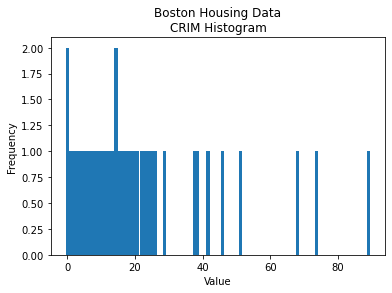

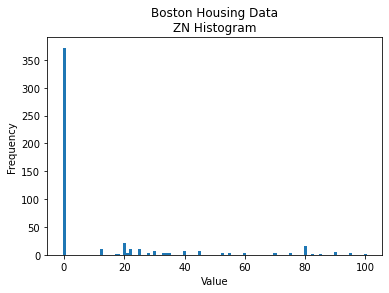

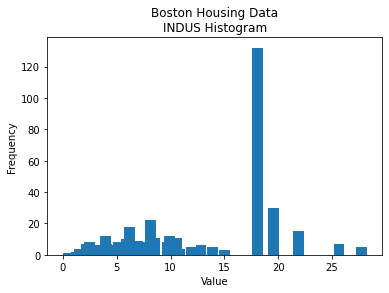

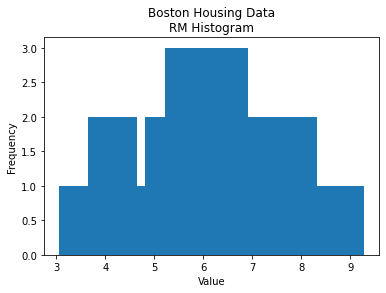

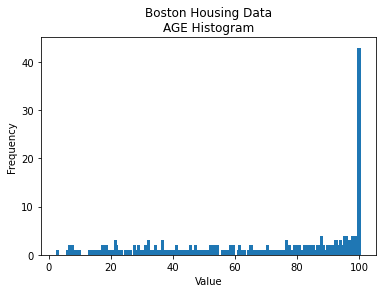

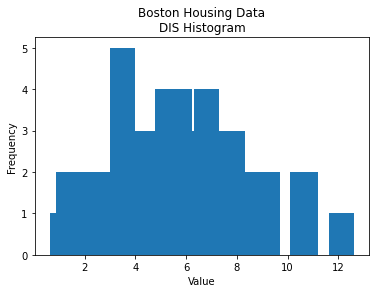

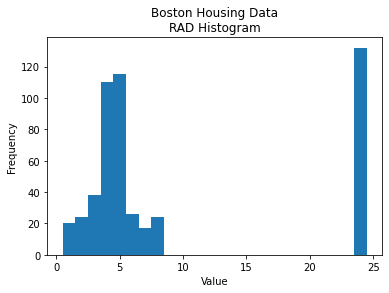

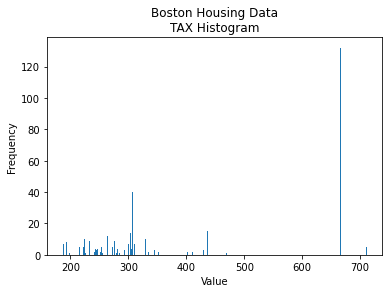

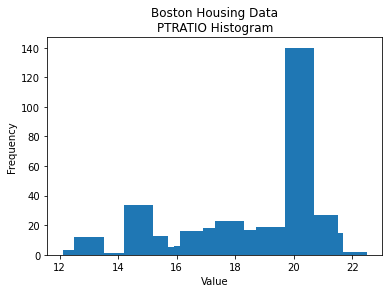

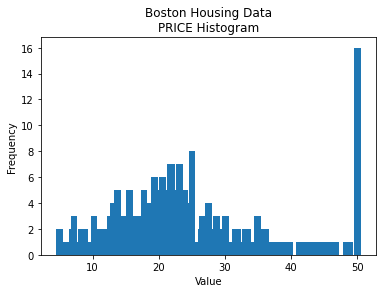

In [70]:
for loople in housing_df.items():
    #//*** A loople is a loop_tuple. I'm sacrficing good syntax on the altar of dad jokes
    column = loople[0]
    hist = loople[1].value_counts().sort_index()
    
    plt.bar(hist.index,hist,1)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(f"Boston Housing Data\n{column} Histogram")
    plt.show()
    #print(f"{hist.index}")

### Crime rate could be an indicator of house price (people don't want to live in high-crime areas). Create a scatter plot of crime rate vs. Price.

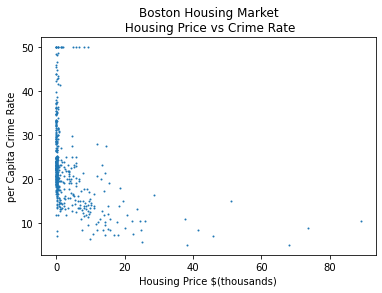

In [73]:
plt.scatter(housing_df["CRIM"],housing_df["PRICE"],1)
plt.title("Boston Housing Market\n Housing Price vs Crime Rate")
plt.xlabel("Housing Price $(thousands)")
plt.ylabel("per Capita Crime Rate")
plt

plt.show()

### We can understand the relationship better if we plot _log10(crime)_ vs. Price. Create that plot and make it nice. Give proper title, x-axis, y-axis label, make data points a color of your choice, etc...
***Hint***: Try `np.log10` function

In [ ]:
# Write your code here

### Can you calculate the mean rooms per dwelling?

In [ ]:
# Write your code here

### Can you calculate median Age?

In [ ]:
# Write your code here

### Can you calculate average (mean) distances to five Boston employment centres?

In [ ]:
# Write your code here

### Tricky question: Can you calculate the percentage of houses with low price (< $20,000)?

In [ ]:
# Write your code here

In [ ]:
# //*** CODE HERE

# Exercise #2

- ## Activity 06: Working with adult income dataset (UCI)

In this activity, you will work with **Adult Income Dataset** from UCI Machine Learning portal. The Adult Income data set has been used in many machine learning papers that address classification problems. You will read the data from a CSV file into a Pandas DataFrame and do practice some of the advanced data wrangling you learned in this Lesson.

### URL for downloading the data
We have the data downloaded as a CSV file on the disk for your ease. However, it is recommended to practice data download on your own so that you are familiar with the process.

**Here is the URL for the data set**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

**Here is the URL for the description of the data set and the variables (at the end of the document)**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

### Attributes/Variables

Following are the details of the type of the attributes of this dataset for your reference. You may have to refer them while answering question on this activity. Note that, many of the attributes are of discrete factor type. These are common type for a classification problem unlike continuous numeric values used for regression problems.

* __age__: continuous.
* __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt__: continuous.
* __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num__: continuous.
* __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex__: Female, Male.
* __capital-gain__: continuous.
* __capital-loss__: continuous.
* __hours-per-week__: continuous.
* __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### A special note on the variable 'fnlwgt':

The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls. These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. 

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Load necessary libraries

In [ ]:
# Write your code here

### Read in the adult income data set (given as a .csv file) from the local directory and check first 5 records

In [ ]:
# Write your code here

### Do you think the column names (headers) make sense?

In [ ]:
# Write your answer here

### Time to read in the text file with data descriptions and extract header names
Write a file reading script which reads the text file line by line, and extracts the first phrase which is the header name

In [ ]:
# Write your code here

### Add a name ("_Income_") for the response variable (last column) to the dataset and read it again with the column names supplied 

In [ ]:
# Write your code here

In [ ]:
# Write your code here

### Show a statistical summary of the data set. Did you notice only a small number of columns are included?

In [ ]:
# Write your code here

### Many variables in the dataset have multiple factors or classes. Can you write a loop to count and print them?

In [ ]:
# Write your code here

In [ ]:
# Write your code here

### Is there any missing (NULL) data in the dataset? Write a single line of code to show this for all coumns

In [ ]:
# Write your code here

### Practice subsetting: Create a DataFrame with only 
* age, 
* education,
* occupation
* race

In [ ]:
# Write your code here

### Show the histogram of age with bin size = 20

In [ ]:
# Write your code here

### Show boxplots of _age_ grouped by _race_ (Use a long figure size 15x6 and make _x_ ticks font size 15 )

In [ ]:
# Write your code here

### Before doing further operation, we need to use the skill with 'apply' method we learned in this lesson. <br><br> But why? - Turns out that during reading the dataset from the CSV file, all the strings came with a whitespace character in front. So, we need to remove that whitespace from all the strings. 

### Let's write a small function to strip the whitespace character

In [ ]:
# Write your function here

### Use the 'apply' method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

#### This is the preferred method so that you don't accidentally delete valuable data. Most of the time, create a new column with a desired operation and then copy it back to the old column if necessary.

#### IGNORE any warning messages printed.

In [ ]:
# Education column
# Write your code here

# Occupation column
# Write your code here

# Race column
# Write your code here

### Answer the following question using conditional filtering/boolean indexing: <br><br> _"How many black people of age between 30 and 50 (inclusive) are represented in this dataset?"_

In [ ]:
# Write a code with conditional clauses and join them by & (AND) to filter the dataframe
# Write your code here

In [ ]:
# We can look at the shape of the filtered dataframe and take the 1st element at 0 index of the tuple
# Write your code here

In [ ]:
# Print out the number of black people between 30 and 50
# Write your code here

### Practice "GroupBy": Group by race and education to show how the mean age is distributed

In [ ]:
# Write your code here

### Group by occupation and show the summary statistics of age. Try to answer the following questions,
* Which profession has oldest workers on the average?
* Which profession has its largest share of workforce above 75th percentile?

In [ ]:
# Write your code here to answer the questions above

### Detecting outlier: Is there a particular occupation group which has very low representation? Perhaps we should remove those data because with very low data the group won't be useful in analysis

Actually, just by looking at the table above, you should be able to see that **'Armed-Forces'** group has only 9 count i.e. 9 data points. But how to detect it. Plot the count column in a bar chart.

Note, how the first argument to the barh function is the index of the dataframe which is the summary stats of the occupation groups. We see that 'Armed-Forces' group has almost no data.

#### This exercise teaches you that sometimes, outlier is not just a value but can be a whole group. The data of this group is fine but it is too small to be useful for any analysis. So it can be treated as an outlier in this case. 

#### But always use your business knowledge and engineering judgement for such outlier detection and how to process them.

In [ ]:
# Write your code here

In [ ]:
# Create a horizontal bar chart
# Write your code here

### Practice Merging by common keys: Suppose you are given two datasets where the common key is `occupation`. Can you merge them? 

#### First create two such disjoint datasets by taking random samples from the full dataset and then try merging. Include at least 2 other columns along with the common key column for each dataset.

#### Notice how the resulting dataset, after merging, may have more data points than either of the two starting datasets if your common key is not unique? Why is it so?

In [ ]:
# Sample first dataframe with 5 elements and your chosen random_state
# Write your code here

In [ ]:
# Sample second dataframe with 5 elements and your chosen random_state
# Write your code here

In [ ]:
# Merge the dataframes
# Write your code here

In [ ]:
# Show the merged dataframe

In [ ]:
# //*** CODE HERE

In [ ]:
# //*** CODE HERE

In [ ]:
# //*** CODE HERE

In [ ]:
# //*** CODE HERE

# Exercise #3

3. Create a series and practice basic arithmetic steps

a. Series 1 = 7.3, -2.5, 3.4, 1.5

i. Index = ‘a’, ‘c’, ‘d’, ‘e’

b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1

i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’

c. Add Series 1 and Series 2 together and print the results

d. Subtract Series 1 from Series 2 and print the results
